## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Project Assigning/Information Gathering

In [ ]:
Client                >> Person
Company               >> Car Company
Project               >> Car (Service >> Testing, Web Development, Games, Automation)
POC(Proof of Concept) >> Test Drive

POC >> Paid POC/Non-Paid
Duration >> 1 week to 4 weeks, rarel(2-3 months )
POC Started >> 12-12-22

Sensitive Data(Info):
    NDA(Non Disclosure Agreement)
    
Data:
    Download >> less observation
    Access (SQL - Server) >> Limited Access
    
Problem Statement >> Solution
output >> Deliverables

Client Meeting - Create PPT/Deck
Requirements >> Set of features to use:
    1) Veg/Non-Veg
    2) Indian/Foreign
    3) Ambiance
    4) Price
    5) Type of place
    6) Liquor
    
Approach:
    ML(Regression, Classification, Segmentation)
    DL
    TSA
    NLP
    Chatbot
    Without ML
    
POC/SPOC >> Single point of Contact

POC- Closure(Delivered)  >> 12-01-23

Project Kickoff >> 20-01-23

## 1. Problem Statement/Business Problem

In [ ]:
# Hypothesis(Assumptions) Generation

To predict SepalLengthCm values from independent variables

Dependent var >> SepalLengthCm
Independent var >> SepalWidthCm, PetalLengthCM, PetalWidthCM, Species

## 2. Data Gathering 

In [2]:
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df['Species'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 3. Exploratory Data Analysis

In [6]:
iris_df.shape

(150, 5)

In [7]:
row_count = iris_df.shape[0]
col_count = iris_df.shape[1]
print(row_count, col_count)

150 5


In [8]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
iris_df.columns = ['Sepal_Length_CM', 'Sepal_Width_CM','Petal_Length_CM','Petal_Width_CM','Species']
iris_df.head()

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3 Types of EDA:
    1) Univariate >> Analyse Single Var
    2) Bivariate >> Analyse two var at a time
    3) Multivariate >> Analyse multiple var at a time

#### 3.1 Sepal_Width_CM

In [22]:
iris_df['Sepal_Width_CM'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [23]:
iris_df['Sepal_Width_CM'].nunique()

23

<AxesSubplot:xlabel='Sepal_Width_CM', ylabel='Count'>

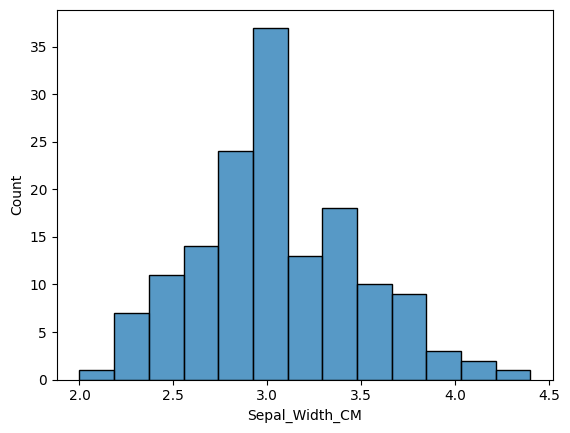

In [24]:
sns.histplot(iris_df['Sepal_Width_CM'])

<AxesSubplot:xlabel='Sepal_Width_CM', ylabel='Density'>

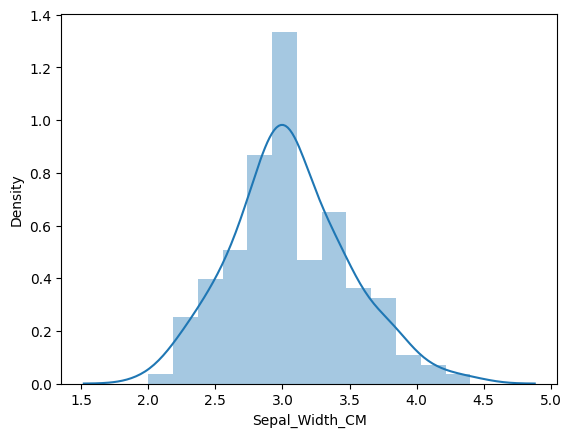

In [29]:
sns.distplot(iris_df['Sepal_Width_CM'])

<AxesSubplot:xlabel='Sepal_Width_CM', ylabel='Density'>

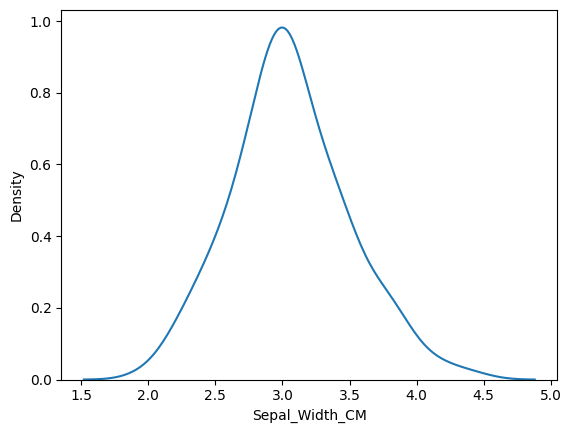

In [30]:
sns.kdeplot(iris_df['Sepal_Width_CM'])

<AxesSubplot:xlabel='Sepal_Width_CM', ylabel='count'>

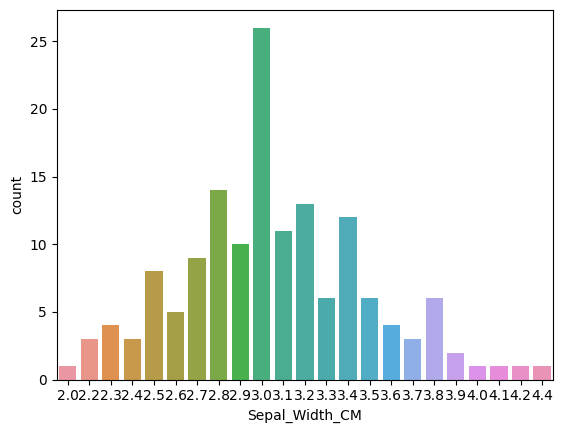

In [31]:
sns.countplot(iris_df['Sepal_Width_CM'])

#### 3.2 Petal_Length_CM

In [32]:
iris_df['Petal_Length_CM']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: Petal_Length_CM, Length: 150, dtype: float64

In [33]:
iris_df['Petal_Length_CM'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [34]:
iris_df['Petal_Length_CM'].nunique()

43

<AxesSubplot:xlabel='Petal_Length_CM', ylabel='Count'>

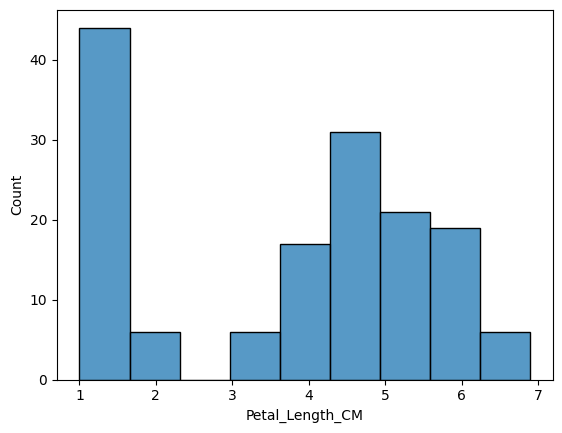

In [35]:
sns.histplot(iris_df['Petal_Length_CM'])

<AxesSubplot:xlabel='Petal_Length_CM', ylabel='Density'>

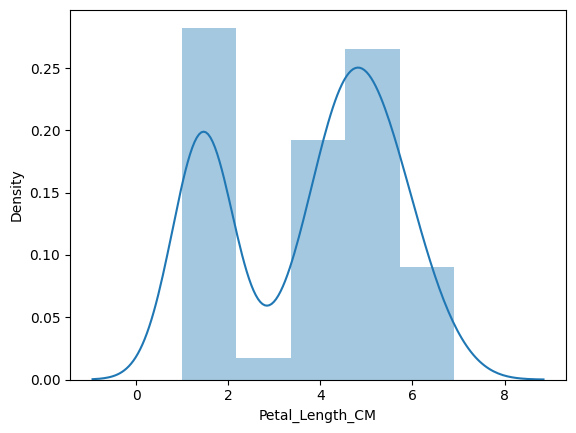

In [36]:
sns.distplot(iris_df['Petal_Length_CM'])

##### Conlusion: This Feature may require transformations

#### 3.3 Petal_Width_CM

In [37]:
iris_df['Petal_Width_CM'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [38]:
iris_df['Petal_Width_CM'].nunique()

22

<AxesSubplot:xlabel='Petal_Width_CM', ylabel='Count'>

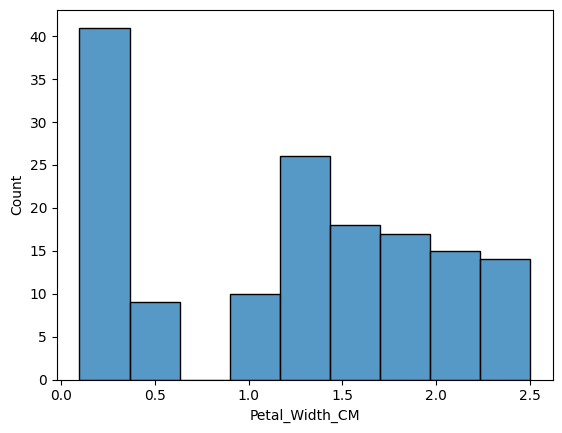

In [40]:
sns.histplot(iris_df['Petal_Width_CM'])

<AxesSubplot:xlabel='Petal_Width_CM', ylabel='Density'>

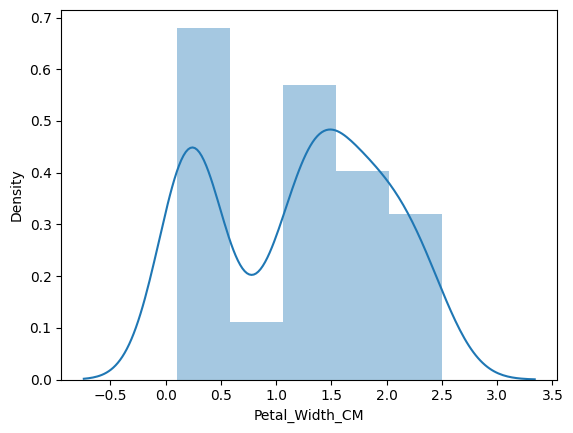

In [39]:
sns.distplot(iris_df['Petal_Width_CM'])

<AxesSubplot:xlabel='Petal_Width_CM', ylabel='Density'>

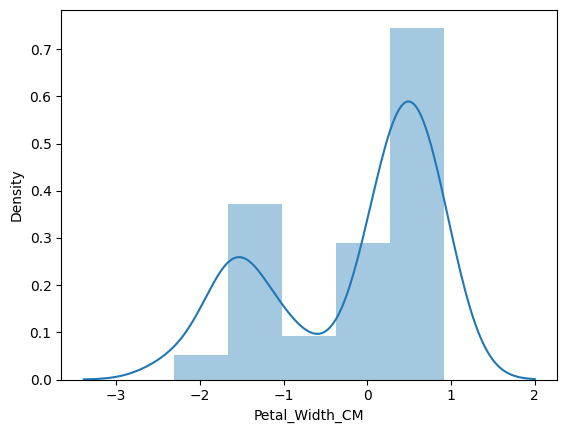

In [41]:
sns.distplot(np.log(iris_df['Petal_Width_CM']))

<AxesSubplot:xlabel='Petal_Width_CM', ylabel='Density'>

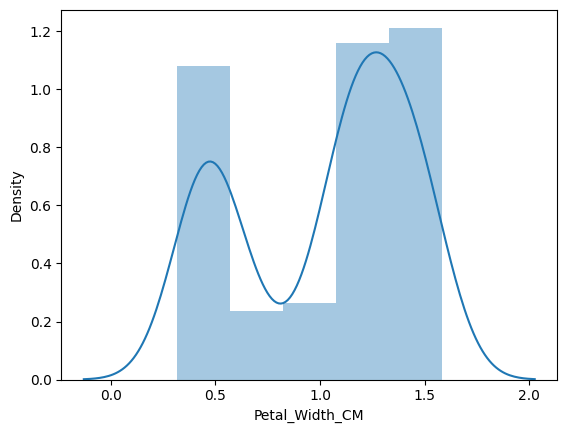

In [43]:
sns.distplot(np.sqrt(iris_df['Petal_Width_CM']))

#### 3.4 Species

In [44]:
iris_df['Species'].unique()

array([0, 1, 2])

In [45]:
iris_df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

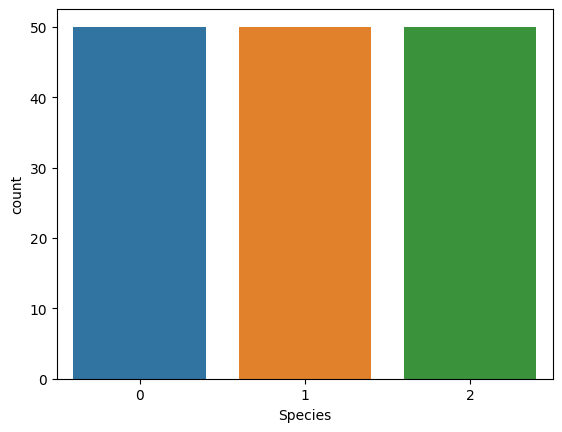

In [46]:
sns.countplot(iris_df['Species'])

<AxesSubplot:>

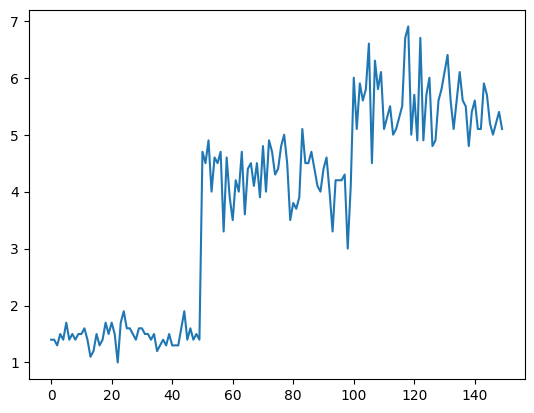

In [47]:
iris_df['Petal_Length_CM'].plot()

<AxesSubplot:>

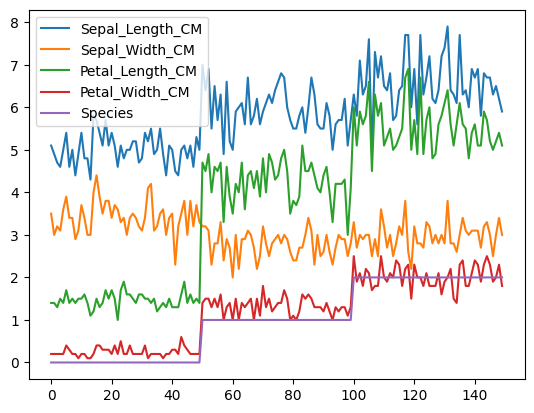

In [48]:
iris_df.plot()

In [49]:
iris_df[75:85]

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
75,6.6,3.0,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
77,6.7,3.0,5.0,1.7,1
78,6.0,2.9,4.5,1.5,1
79,5.7,2.6,3.5,1.0,1
80,5.5,2.4,3.8,1.1,1
81,5.5,2.4,3.7,1.0,1
82,5.8,2.7,3.9,1.2,1
83,6.0,2.7,5.1,1.6,1
84,5.4,3.0,4.5,1.5,1


## 4. Feature Engineering

## 5. Feature Selection

#### 1. Linearity

In [50]:
iris_df.cov()      # Covariance Matrix

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
Sepal_Length_CM,0.685694,-0.042434,1.274315,0.516271,0.530872
Sepal_Width_CM,-0.042434,0.189979,-0.329656,-0.121639,-0.152349
Petal_Length_CM,1.274315,-0.329656,3.116278,1.295609,1.372483
Petal_Width_CM,0.516271,-0.121639,1.295609,0.581006,0.597315
Species,0.530872,-0.152349,1.372483,0.597315,0.671141


In [51]:
iris_df.std() 

Sepal_Length_CM    0.828066
Sepal_Width_CM     0.435866
Petal_Length_CM    1.765298
Petal_Width_CM     0.762238
Species            0.819232
dtype: float64

In [52]:
iris_df.var() 

Sepal_Length_CM    0.685694
Sepal_Width_CM     0.189979
Petal_Length_CM    3.116278
Petal_Width_CM     0.581006
Species            0.671141
dtype: float64

In [53]:
iris_df.corr()

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
Sepal_Length_CM,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal_Width_CM,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal_Length_CM,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal_Width_CM,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Sepal_Length_CM'>

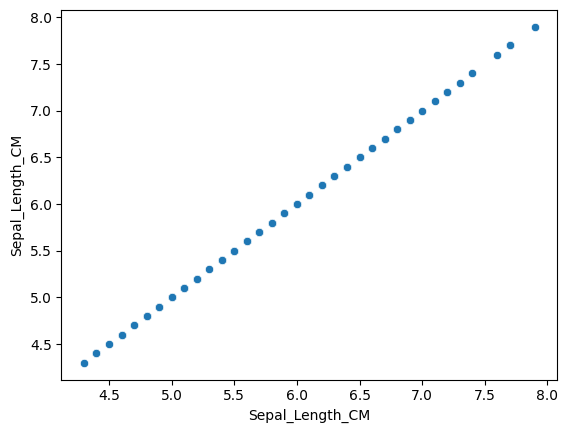

In [54]:
sns.scatterplot(iris_df['Sepal_Length_CM'], iris_df['Sepal_Length_CM'])

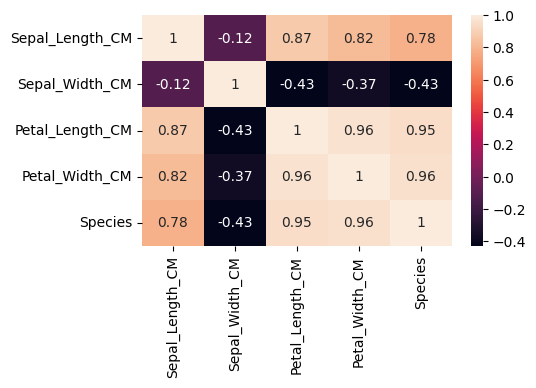

In [58]:
plt.figure(figsize=(5,3))
sns.heatmap(iris_df.corr(), annot=True)
plt.savefig('Correlation_matrix.jpg')

In [60]:
correlation = iris_df.corr().head(1)
correlation

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
Sepal_Length_CM,1.0,-0.11757,0.871754,0.817941,0.782561


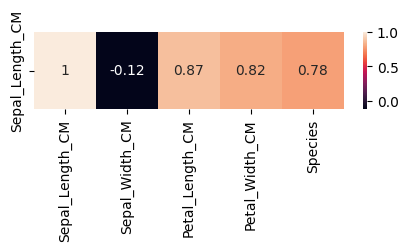

In [62]:
plt.figure(figsize=(5,1))
sns.heatmap(correlation, annot=True)
plt.savefig('Correlation_target.jpg')

<AxesSubplot:xlabel='Petal_Length_CM', ylabel='Sepal_Length_CM'>

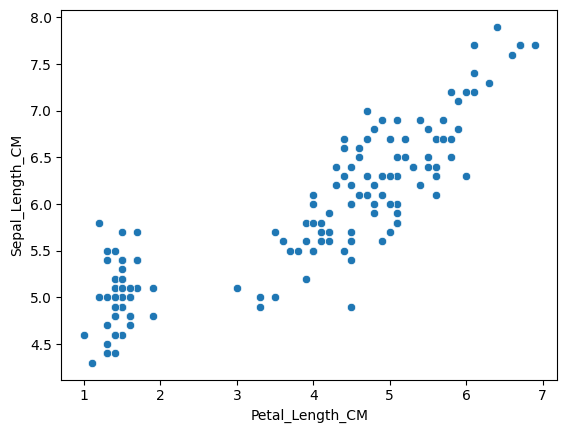

In [63]:
sns.scatterplot(iris_df['Petal_Length_CM'], iris_df['Sepal_Length_CM'])

<AxesSubplot:xlabel='Sepal_Width_CM', ylabel='Sepal_Length_CM'>

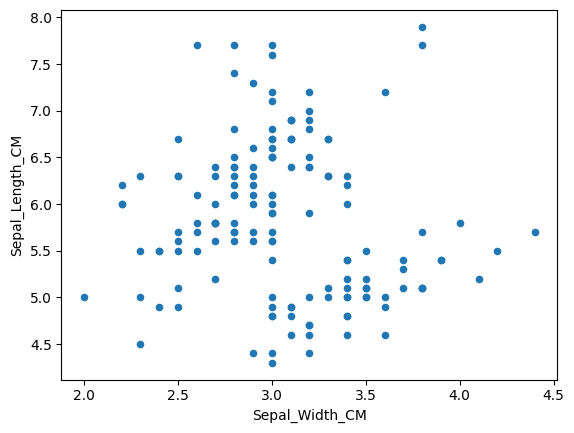

In [65]:
iris_df.plot(x = 'Sepal_Width_CM',y = 'Sepal_Length_CM', kind = 'scatter')

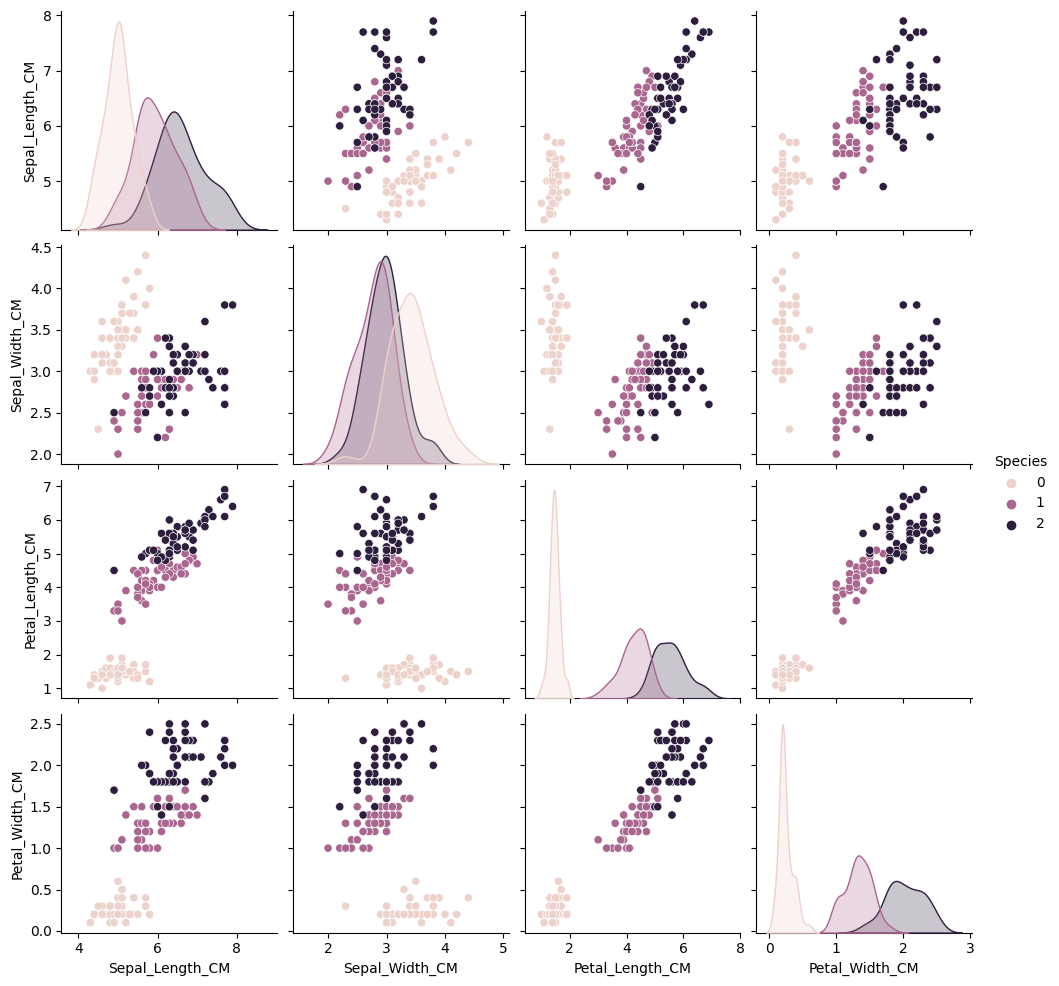

In [67]:
sns.pairplot(iris_df, hue='Species')

### 2. No Multicolinearity

In [ ]:
VIF >> Variance Inflation Factor

In [68]:
iris_df.columns

Index(['Sepal_Length_CM', 'Sepal_Width_CM', 'Petal_Length_CM',
       'Petal_Width_CM', 'Species'],
      dtype='object')

In [77]:
for i in range(1, iris_df.shape[1]):
    vif = variance_inflation_factor(iris_df.values, i)
    print(f'VIF of {iris_df.columns[i]} is :', vif)

VIF of Sepal_Width_CM is : 96.46673090053491
VIF of Petal_Length_CM is : 191.61705308519376
VIF of Petal_Width_CM is : 71.03519530845257
VIF of Species is : 35.71225297716894


In [78]:
vif_list = []
for i in range(1, iris_df.shape[1]):
    vif = variance_inflation_factor(iris_df.values, i)
    vif_list.append(vif)
    
vif_list

[96.46673090053491, 191.61705308519376, 71.03519530845257, 35.71225297716894]

In [79]:
x = iris_df.drop('Sepal_Length_CM', axis=1)
x

,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [84]:
df2 = pd.DataFrame()
df2['Features']= x.columns
df2['VIF'] = [variance_inflation_factor(x.values, i) for i in range( x.shape[1])]
df2

,Features,VIF
0,Sepal_Width_CM,8.658997
1,Petal_Length_CM,69.868367
2,Petal_Width_CM,62.602077
3,Species,35.003153


<AxesSubplot:>

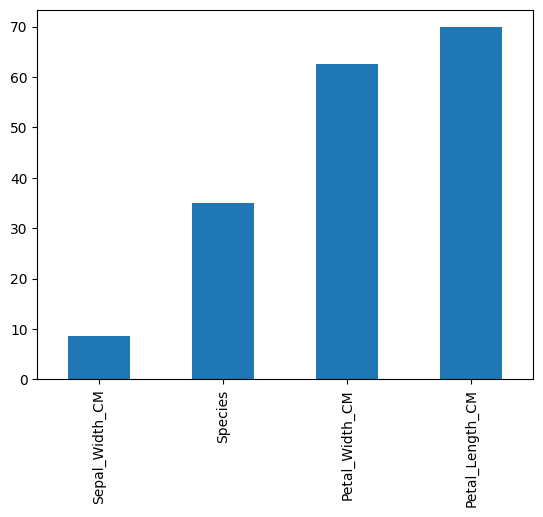

In [89]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind='bar')

<AxesSubplot:>

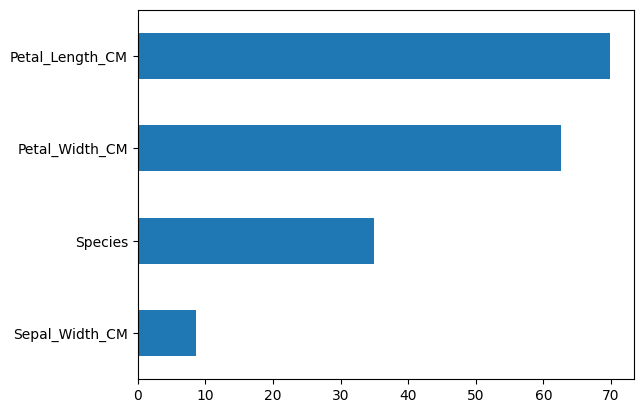

In [90]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind='barh')

## 6. Model Training/Building

In [16]:
x = iris_df.drop('Sepal_Length_CM', axis=1)   # 2D
y = iris_df['Sepal_Length_CM']   # 1D

## Splitting dataset into train and test

#### Train Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)
x_train

,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
126,2.8,4.8,1.8,2
23,3.3,1.7,0.5,0
64,2.9,3.6,1.3,1
117,3.8,6.7,2.2,2
84,3.0,4.5,1.5,1
...,...,...,...,...
75,3.0,4.4,1.4,1
43,3.5,1.6,0.6,0
22,3.6,1.0,0.2,0
72,2.5,4.9,1.5,1


In [18]:
x_test.shape

(30, 4)

In [19]:
y_test.shape

(30,)

In [20]:
y_train.shape

(120,)

## Instantiation of Linear Regression Model

In [21]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

### Model Training

In [22]:
linear_reg.fit(x_train, y_train)   # Use to train the model, It learns parameters of instance

LinearRegression()

y = m1x1+ m2x2 + m3x3 + m4x4 + C

In [25]:
linear_reg.coef_

array([ 0.67427277,  0.73517612, -0.38876303, -0.22592787])

In [26]:
linear_reg.n_features_in_

4

In [27]:
linear_reg.intercept_

1.716130463699776

## Model Evaluation

In [28]:
y_pred = linear_reg.predict(x_test)
y_pred

array([4.92127555, 4.83138763, 5.8483112 , 4.72931905, 5.32773991,
       6.92909369, 4.83747797, 6.5142047 , 6.4528224 , 4.65156644,
       5.2359513 , 4.75177969, 4.67826207, 5.44008847, 6.46900171,
       6.17683197, 4.10605789, 6.0279414 , 6.70797119, 5.61119707,
       6.52800436, 6.10145901, 6.42422607, 5.89308685, 5.77041296,
       4.97233252, 4.75177969, 6.18968258, 5.51969642, 7.13323087])

In [29]:
y_pred[:5]   # pred

array([4.92127555, 4.83138763, 5.8483112 , 4.72931905, 5.32773991])

In [30]:
y_test[:5]

6      4.6
3      4.6
113    5.7
12     4.8
24     4.8
Name: Sepal_Length_CM, dtype: float64

In [31]:
x_test[:5]

,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
6,3.4,1.4,0.3,0
3,3.1,1.5,0.2,0
113,2.5,5.0,2.0,2
12,3.0,1.4,0.1,0
24,3.4,1.9,0.2,0


In [32]:
residuals = y_test - y_pred
residuals

6     -0.321276
3     -0.231388
113   -0.148311
12     0.070681
24    -0.527740
129    0.270906
25     0.162522
108    0.185795
128   -0.052822
45     0.148434
48     0.064049
42    -0.351780
35     0.321738
5     -0.040088
85    -0.469002
54     0.323168
41     0.393942
96    -0.327941
144   -0.007971
89    -0.111197
77     0.171996
74     0.298541
115   -0.024226
94    -0.293087
87     0.529587
29    -0.272333
2     -0.051780
127   -0.089683
44    -0.419696
125    0.066769
Name: Sepal_Length_CM, dtype: float64

## Evaluation on Testing Data

In [33]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r_squared = r2_score(y_test, y_pred)
print('R Squared Value: ', r_squared)

adj_r2 = 1 - (((1-r_squared)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]- 1))
print('Adj R Squared Value: ', adj_r2)

Mean Squared Error : 0.07350315613968077
Root Mean Squared Error : 0.27111465497032944
Mean Absolute Error : 0.22494826893879452
R Squared Value:  0.8982827349072626
Adj R Squared Value:  0.8820079724924247


In [34]:
r_squared = linear_reg.score(x_test,y_test)
print('R Squared Value: ', r_squared)

R Squared Value:  0.8982827349072626


## Evaluation on Training Data

In [35]:
y_pred_train = linear_reg.predict(x_train)
y_pred_train

array([5.98131041, 4.9966485 , 5.58683573, 7.8969126 , 6.23816891,
       5.21768029, 6.4139461 , 6.35056282, 5.47634251, 6.20976357,
       6.17074163, 6.10145901, 6.86533174, 5.07834814, 5.10718708,
       6.59010197, 4.96015185, 6.27095488, 5.02757913, 5.10109674,
       4.95406152, 5.59735205, 6.63259823, 7.75411237, 5.18070469,
       6.53847532, 6.74075716, 7.32285307, 5.84041088, 4.50876621,
       4.90490524, 6.09555967, 5.88699651, 5.63365771, 6.87751241,
       5.98740075, 5.8134789 , 5.15819869, 6.18106696, 5.14601802,
       5.96860543, 5.71750065, 4.95377355, 5.4115375 , 5.43984586,
       6.01761607, 6.45263141, 7.30039243, 4.69044274, 6.54860966,
       5.26450227, 5.71141031, 6.71829652, 4.87026394, 5.02310153,
       4.83138763, 4.91518522, 5.2359513 , 6.51415934, 6.92852402,
       5.02943447, 5.54453671, 5.8871875 , 7.19594419, 5.52554414,
       7.20432347, 5.14577542, 6.36697849, 6.33248281, 4.98870283,
       6.89816306, 6.3367178 , 6.24259489, 4.62301547, 5.97707

In [36]:
mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error :', mae)

r_squared = r2_score(y_train, y_pred_train)
print('R Squared Value: ', r_squared)

adj_r2 = 1 - (((1-r_squared)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]- 1))
print('Adj R Squared Value: ', adj_r2)

Mean Squared Error : 0.09963711783385969
Root Mean Squared Error : 0.31565347746201006
Mean Absolute Error : 0.2552715437024567
R Squared Value:  0.8481319949057922
Adj R Squared Value:  0.842849629511211


In [37]:
r_squared = linear_reg.score(x_train,y_train)
print('R Squared Value: ', r_squared)

R Squared Value:  0.8481319949057922


In [38]:
linear_reg.predict([[3.4,2.9,1.4,1]])

array([5.37047253])

## 1. Assumptions of Linear Regression

In [ ]:
1. Linearity
2. No Multicolinearity
3. Normality of Error/Residuals
4. HomoScedasticity (Residuals)

## Normality of Error/Residuals

In [ ]:
Residuals values should be normally distributed

residuals = (Ya - Yp)
Residual can be positive or negative or zero

How to check normality:
    1. Visualization Tools (seaborn and matplotlib):
        1. kdeplot
        2. distplot
        
    2. QQ-Plot (Powerful method to verify normality):
        Quantile-Quantile plot
        
    3. Skewness of residuals
    
    4. Hypothesis Testing:
        1. Shapiro
        2. kstest
        3. normaltest
    

In [87]:
y_train[:5]

126    6.2
23     5.1
64     5.6
117    7.7
84     5.4
Name: Sepal_Length_CM, dtype: float64

In [88]:
y_pred_train[:5]

array([5.98131041, 4.9966485 , 5.58683573, 7.8969126 , 6.23816891])

In [89]:
y_train[:5] - y_pred_train[:5]

126    0.218690
23     0.103351
64     0.013164
117   -0.196913
84    -0.838169
Name: Sepal_Length_CM, dtype: float64

In [91]:
mse = (((y_train -y_pred_train)**2).sum())/len(y_train)
mse

0.09963711783385969

In [92]:
mae = ((np.abs(y_train -y_pred_train)).sum())/len(y_train)
mae

0.2552715437024567

In [39]:
residuals  = y_train - y_pred_train
residuals

126    0.218690
23     0.103351
64     0.013164
117   -0.196913
84    -0.838169
         ...   
75     0.396472
43    -0.019109
22    -0.200936
72     0.104897
15     0.069810
Name: Sepal_Length_CM, Length: 120, dtype: float64

## 1. kdeplot

<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Density'>

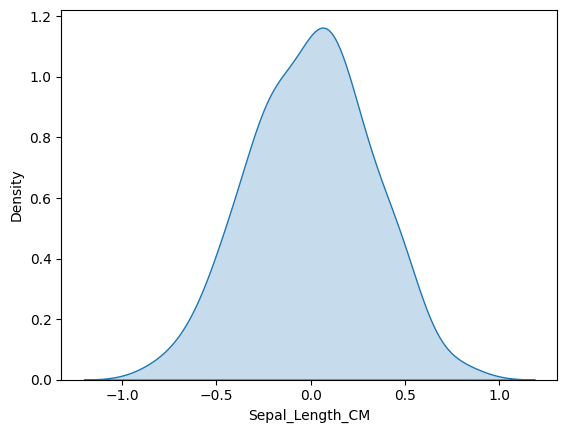

In [95]:
sns.kdeplot(residuals, fill=True)

<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Density'>

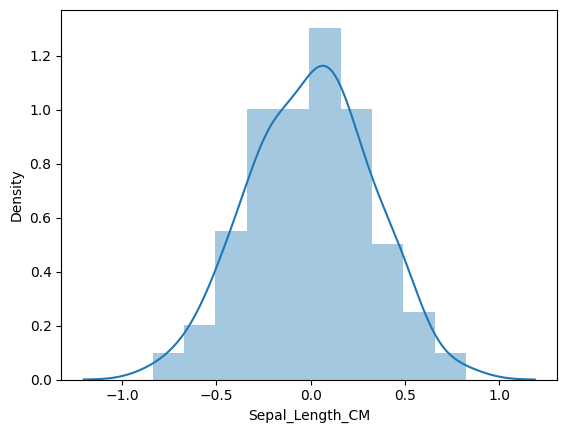

In [96]:
sns.distplot(residuals)

<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Count'>

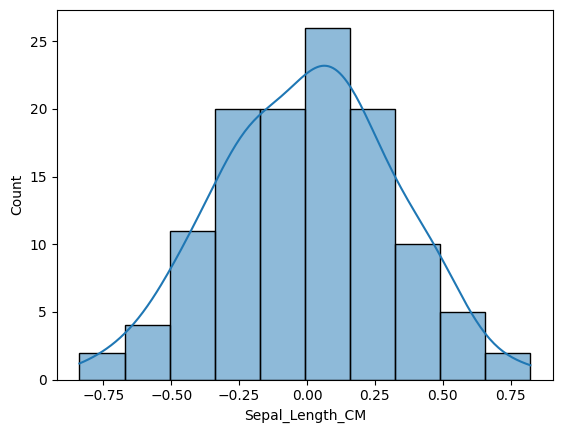

In [97]:
sns.histplot(residuals, kde=True)

<AxesSubplot:ylabel='Count'>

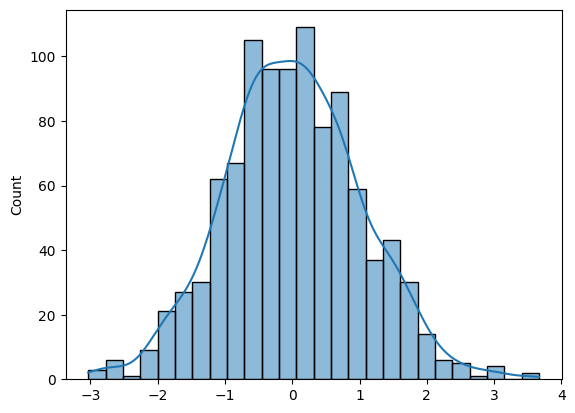

In [40]:
array = np.random.randn(1000)
sns.histplot(array, kde=True)

In [41]:
arr2 = np.array([1,2,3,42,44,44,45,46,47,48,49,45,46,48,49,46,50,52,51,51,50,50,53,56])
arr3 = np.array([1,1,2,1,2,2,3,2,3,4,5,4,5,4,5,6,5,6,5,6,7,8,8,9,10,10,9,8,51,51,52,53])

<AxesSubplot:ylabel='Density'>

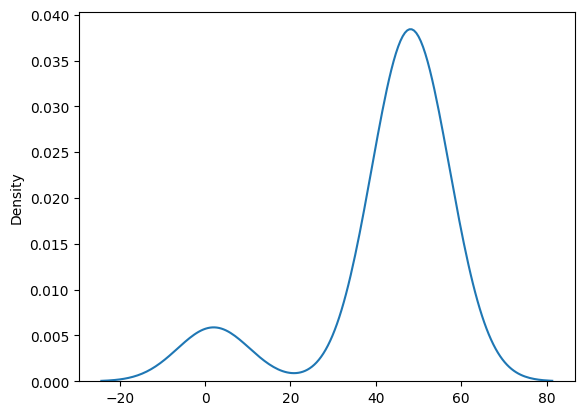

In [101]:
sns.kdeplot(arr2)

<AxesSubplot:ylabel='Density'>

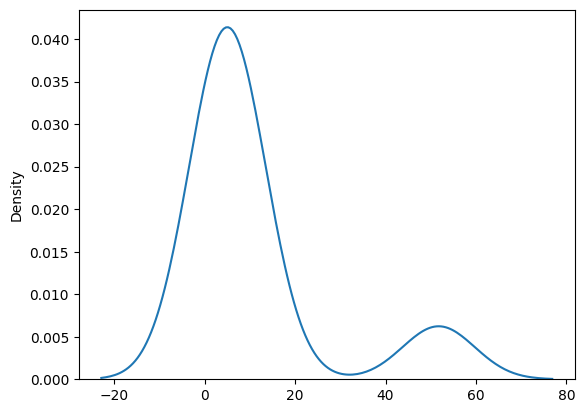

In [102]:
sns.kdeplot(arr3)

## 2. QQ-Plot

In [ ]:
Quantile Quantile Plot

In [103]:
import statsmodels.api as sm

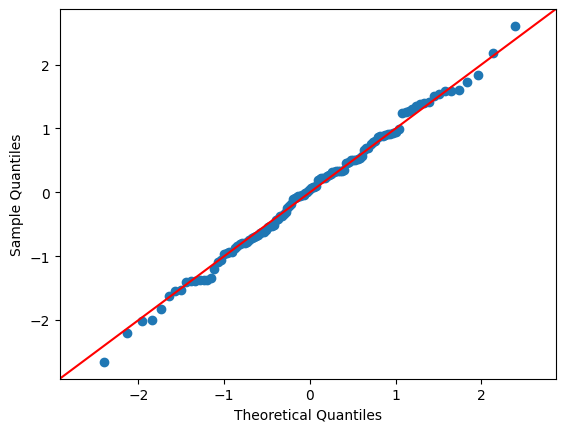

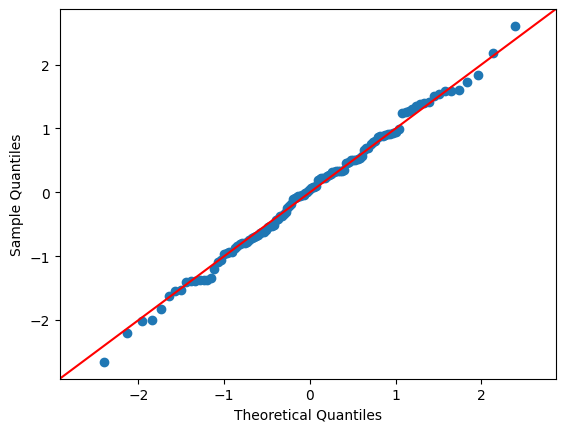

In [106]:
sm.qqplot(residuals, line = '45', fit = True)

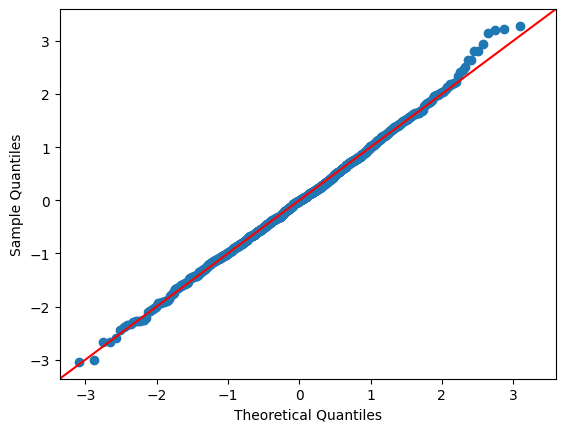

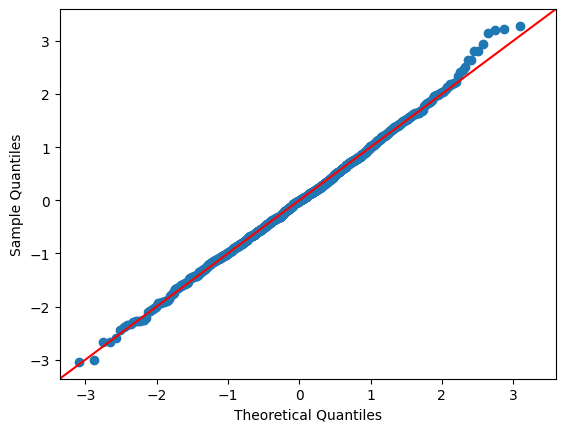

In [107]:
sm.qqplot(array, line = '45', fit = True)

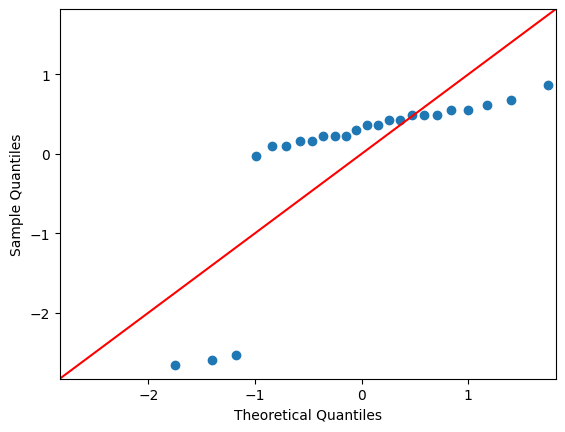

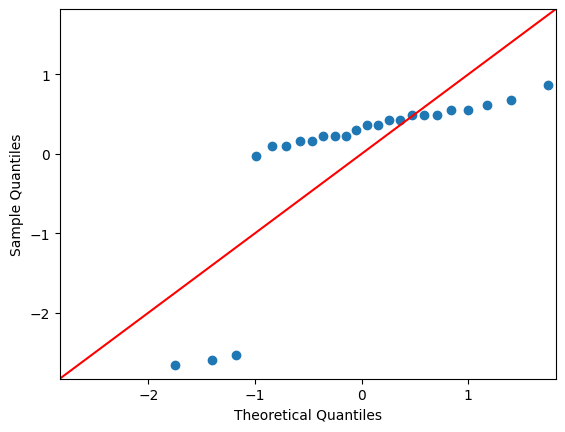

In [108]:
sm.qqplot(arr2, line = '45', fit = True)

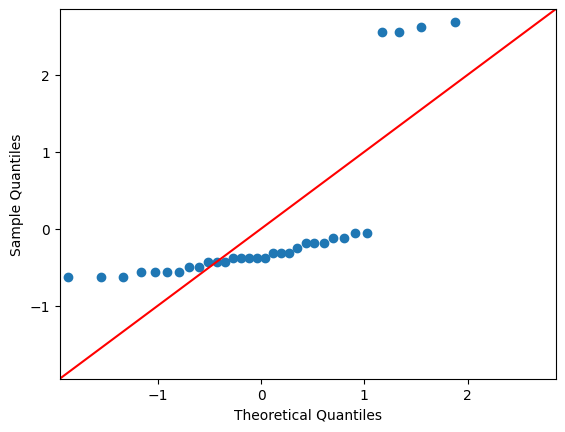

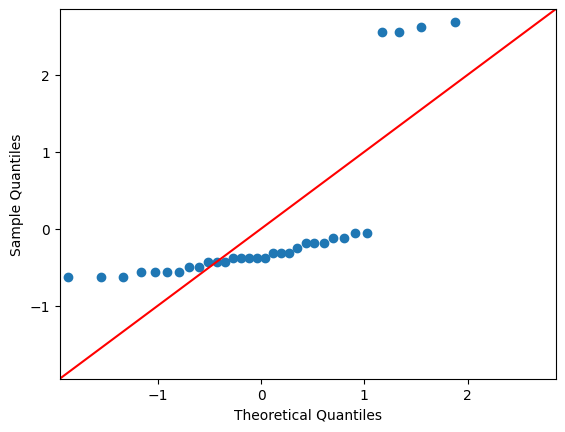

In [109]:
sm.qqplot(arr3, line = '45', fit = True)

## 3. Skewness

In [ ]:
Normally Distributed/Symmetrical Data >> Bell Shape Curve
Positive Skewness >> Tail of the Distribution is longer towards right hand side
Negative Skewness >> Tail of the Distribution is longer towards left hand side

-0.5 to +0.5    >> Symmetrical Distribution  (-0.2,0.4,0.3)
0.5 to 1        >> Positively skewed data (0.6,0.8,0.9)
-0.5 to -1.0    >> Negatively skewed data (-0.57,0.7,0.9)

Skew > 1.0   >> Highly Positively skewed data (1.45,1.8)
Skew < -1.0  >> Highly Negatively skewed data (-1.5,-2.0)

Positively skewed data >> Mean > Median > Mode
Negatively skewed data >> Mode > Median > Mean

<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Density'>

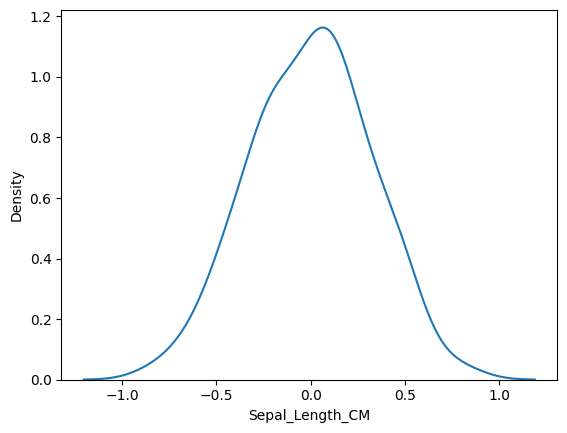

In [110]:
sns.kdeplot(residuals)

In [112]:
residuals.skew()

-0.06487225410579406

In [120]:
Mean = residuals.mean()
print('Mean:', round(Mean,3))

Median = residuals.median()
print('Median:', Median)

Mode = residuals.mode()[0]
print('Mode:', Mode)

# 

Mean: 0.0
Median: 0.01841087879606995
Mode: -0.29555966901890507


In [113]:
iris_df['Sepal_Width_CM'].skew()

0.31896566471359966

In [42]:
s2 = pd.Series(arr2)
s3 = pd.Series(arr3)

<AxesSubplot:ylabel='Density'>

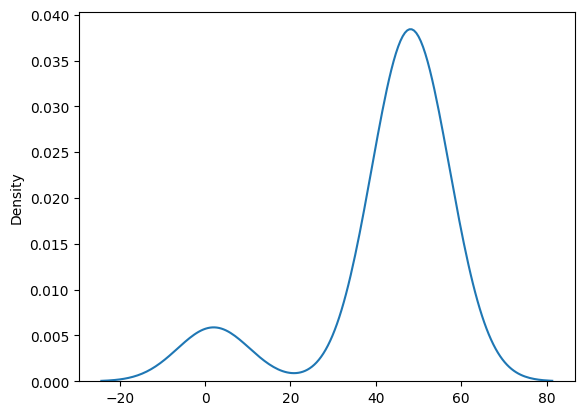

In [115]:
sns.kdeplot(s2)

In [116]:
s2.skew()

-2.228171404710438

In [121]:
Mean = s2.mean()
print('Mean:', round(Mean,3))

Median = s2.median()
print('Median:', Median)

Mode = s2.mode()[0]
print('Mode:', Mode)

# Mean < Median < Mode  >>  Negatively Skewed Data

Mean: 42.417
Median: 47.5
Mode: 46


<AxesSubplot:ylabel='Density'>

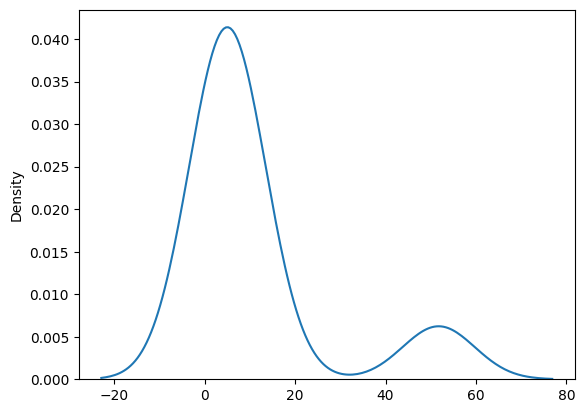

In [117]:
sns.kdeplot(s3)

In [118]:
s3.skew()

2.2567675786469077

In [122]:
Mean = s3.mean()
print('Mean:', round(Mean,3))

Median = s3.median()
print('Median:', Median)

Mode = s3.mode()[0]
print('Mode:', Mode)

# Mean > Median > Mode  >>  Positively Skewed Data

Mean: 10.875
Median: 5.0
Mode: 5


## Hypothesis Testing

In [ ]:
Hypothesis >> An Assumption

Null Hypothesis(H0): Data is normally distributed
    Null Hypothesis is True
    We are accepting Null Hypothesis
    
Alternate Hypothesis(Ha): Data is not normally distributed
    Alternate is False
    We are rejecting Alternate Hypothesis
    
p_val >> 0 to 1
significance_level >> 0.05

p_val >= 0.05 : Null Hypothesis is True >> We are accepting H0
p_val <  0.05 : Null Hypothesis if False >> We are rejecting H0
                Alternate Hypothesis is True >> We are accepting Ha
        
p_val >= 0.05 >> Data is normally distributed
p_val < 0.05 >> Data is not normally distributed

In [ ]:
Hypothesis Testing to check Normality:
    1. shapiro
    2. kstest
    3. normaltest

## 1. Shapiro

In [43]:
from scipy.stats import shapiro, kstest, normaltest

In [44]:
shapiro(iris_df['Sepal_Width_CM'])

ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)

<AxesSubplot:xlabel='Sepal_Width_CM', ylabel='Density'>

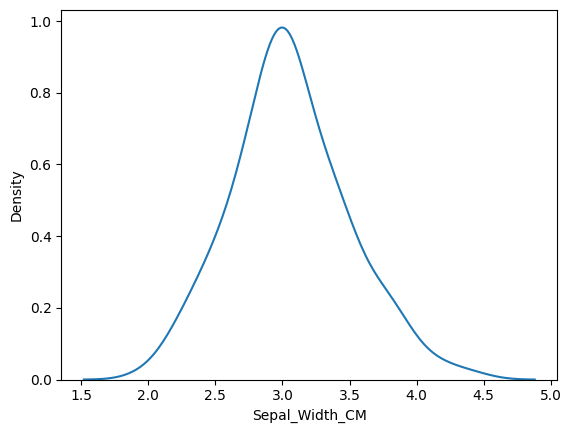

In [50]:
sns.kdeplot(iris_df['Sepal_Width_CM'])

In [47]:
stat, p_val  = shapiro(iris_df['Sepal_Width_CM'])
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 0.10112646222114563
Null Hypothesis is True
Data is normally Distributed


<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Density'>

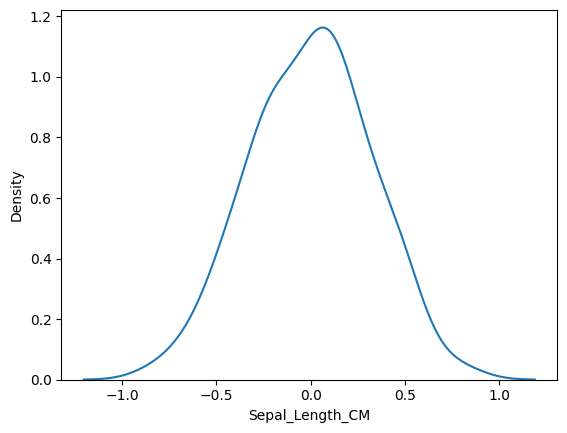

In [48]:
sns.kdeplot(residuals)

In [49]:
stat, p_val  = shapiro(residuals)
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 0.9722458124160767
Null Hypothesis is True
Data is normally Distributed


<AxesSubplot:ylabel='Density'>

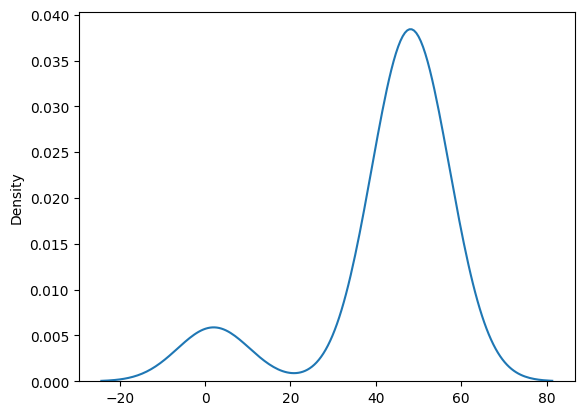

In [51]:
sns.kdeplot(s2)

In [52]:
stat, p_val  = shapiro(s2)
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 4.965132234246994e-07
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


In [53]:
stat, p_val  = shapiro(s3)
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 8.677274010437941e-09
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


## 2. kstest

In [ ]:
Kolomogorov-Smirnov Test

In [54]:
stat, p_val  = kstest(residuals, 'norm')
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 1.9361035449556965e-08
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


In [55]:
stat, p_val  = kstest(s2, 'norm')
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 5.212058730163294e-29
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


In [56]:
stat, p_val  = kstest(s3, 'norm')
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 2.6915812663934944e-30
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


In [57]:
stat, p_val  = kstest(pd.Series(array), 'norm')
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 0.9279263370884915
Null Hypothesis is True
Data is normally Distributed


## 3. normaltest

In [ ]:
It is based on D'Agostino and Pearson's test that combines skew and kurtosis to
produce a result test of normality

In [58]:
stat, p_val  = normaltest(residuals)
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 0.8597049945520034
Null Hypothesis is True
Data is normally Distributed


In [59]:
stat, p_val  = normaltest(s2)
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 2.9144151889301457e-05
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


In [60]:
stat, p_val  = normaltest(s3)
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 4.272425479698657e-06
Null Hypothesis is False
Alternate Hypothesis is True
Data is not normally distributed


<AxesSubplot:ylabel='Density'>

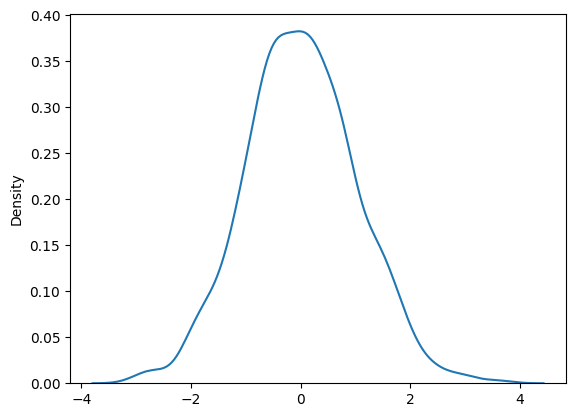

In [81]:
sns.kdeplot(array)

In [62]:
stat, p_val  = normaltest(pd.Series(array))
print('P-Value is :', p_val)

significance_level = 0.05

if p_val >= significance_level:
    print('Null Hypothesis is True')
    print('Data is normally Distributed')
    
else:
    print('Null Hypothesis is False')
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P-Value is : 0.1484840402624936
Null Hypothesis is True
Data is normally Distributed


## 4. Homoscedasticity

In [ ]:
Homoscedasticity >> No Heteroscedasticity

1. Assumption of equal variance
2. Homoscedasticity >> Constant error/residuals
3. Constant error >> Costant Deviation from Zero
4. Dependent var vs residual

In [ ]:
residuals = act - pred

<AxesSubplot:xlabel='Sepal_Length_CM', ylabel='Sepal_Length_CM'>

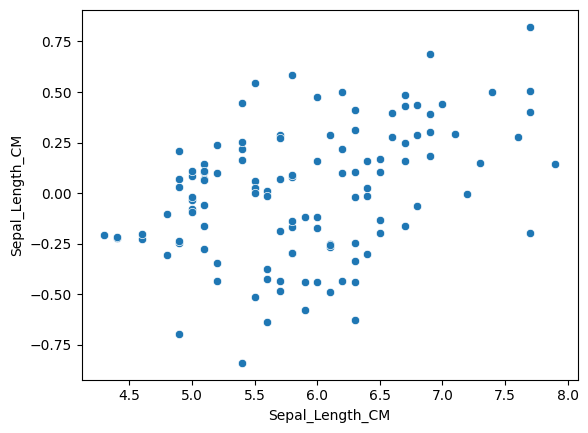

In [123]:
sns.scatterplot(x = y_train, y = residuals)

In [126]:
df2 = pd.DataFrame()
df2['Actual'] = y_train
df2['Residual'] = residuals
df2['flag'] = np.where(df2['Residual'] >=0, 'pos', 'neg')
df2

,Actual,Residual,flag
126,6.2,0.218690,pos
23,5.1,0.103351,pos
64,5.6,0.013164,pos
117,7.7,-0.196913,neg
84,5.4,-0.838169,neg
...,...,...,...
75,6.6,0.396472,pos
43,5.0,-0.019109,neg
22,4.6,-0.200936,neg
72,6.3,0.104897,pos


<AxesSubplot:xlabel='Actual', ylabel='Residual'>

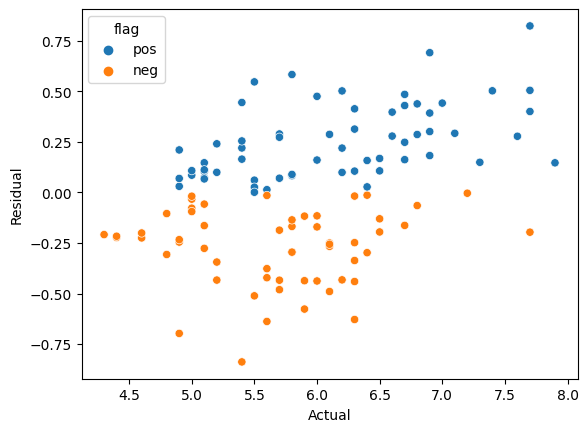

In [128]:
sns.scatterplot(x = df2['Actual'], y = df2['Residual'] , hue = df2['flag'])

In [132]:
pos = df2[df2['flag'] == 'pos']
pos['Residual'].sum()

15.31629262214744

In [133]:
neg = df2[df2['flag'] == 'neg']
neg['Residual'].sum()

-15.316292622147365

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

## Testing on User Inputs

In [ ]:
Testing on Single Row

In [63]:
x_test[3:4]

,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
12,3.0,1.4,0.1,0


In [65]:
y_test[3:4]

12    4.8
Name: Sepal_Length_CM, dtype: float64

In [67]:
x_test[3:4].values.ndim

2

In [68]:
linear_reg.predict(x_test[3:4])

array([4.72931905])

In [69]:
x_test.columns

Index(['Sepal_Width_CM', 'Petal_Length_CM', 'Petal_Width_CM', 'Species'], dtype='object')

In [71]:
x_test.head(1).T

,6
Sepal_Width_CM,3.4
Petal_Length_CM,1.4
Petal_Width_CM,0.3
Species,0.0


In [76]:
Sepal_Width_CM = 3.4
Petal_Length_CM = 1.4
Petal_Width_CM = 0.3
Species = 0.0

# Target(Sepal_Length_CM)  =?

test_array = np.array([Sepal_Width_CM, Petal_Length_CM, Petal_Width_CM, Species], ndmin=2)
test_array

predicted_values = linear_reg.predict(test_array)[0]
print('Predicted Value is :', round(predicted_values, 3))

Predicted Value is : 4.921


In [78]:
Sepal_Width_CM = 3.4
Petal_Length_CM = 1.4
Petal_Width_CM = 0.3
Species = 0.0

# Target(Sepal_Length_CM)  =?

test_array = np.array([Sepal_Width_CM, Petal_Length_CM, Petal_Width_CM, Species], ndmin=2)
test_array

def get_predicted_value(test):
    predicted_values = linear_reg.predict(test)[0]
    print('Predicted Value is :', round(predicted_values, 3))
    
get_predicted_value(test_array)

Predicted Value is : 4.921


In [80]:
import pickle

with open('Linear_Reg_Model.pkl', 'wb') as f:
    pickle.dump(linear_reg, f)